# **Summer Olympics (1976-2008)**

# **Importing libraries and loading data**

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#loading data

# load in the dataset into pandas DF and asigned it to the "df" I also display first 5 rows.
df = pd.read_csv('Summer-Olympic-medals-1976-to-2008.csv', encoding='ISO-8859-1')

# **Exploring Data**

In [3]:
#printing first few rows
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [4]:
#printing the num of total rows and columns
df.shape

(15433, 11)

In [5]:
#checking the type of data
df.dtypes

City             object
Year            float64
Sport            object
Discipline       object
Event            object
Athlete          object
Gender           object
Country_Code     object
Country          object
Event_gender     object
Medal            object
dtype: object

# **Cleaning Data**

In [6]:
#to check null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


In [7]:
#display null values
df.isnull().sum()

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

In [8]:
#dropping null values and then checking the shape of dataframe
df.dropna(inplace=True)
df.shape

(15316, 11)

In [9]:
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


**1. What has been the increase in number of athletes over time?**

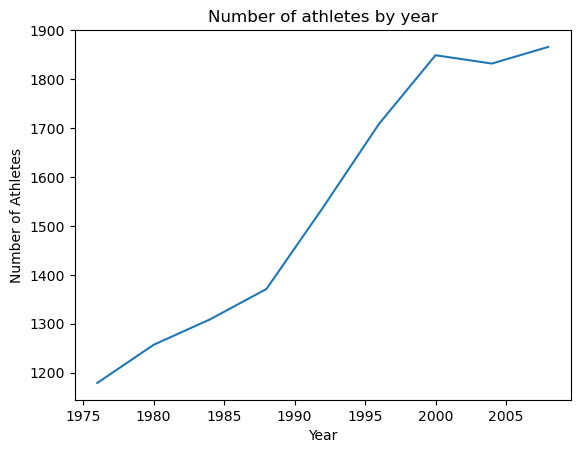

In [10]:
#the number of unique athletes per year
athlete_counts = df.groupby('Year')['Athlete'].nunique().reset_index()

#line plot
sns.lineplot(x="Year", y="Athlete", data=athlete_counts)

#adding title and labels
plt.title("Number of athletes by year")
plt.xlabel("Year")
plt.ylabel("Number of Athletes")

#printing plot
plt.show()

**2. What has been the increase in participating atheletes over time by gender?**

In [11]:
# Group by Year and Gender, count medals, and pivot the result
gender_counts = df.groupby(['Year', 'Gender'])['Medal'].count().unstack(fill_value=0)

# Rename columns for clarity
gender_counts.columns = ['Men', 'Women']

# Reset index to make Year a column
gender_counts = gender_counts.reset_index()

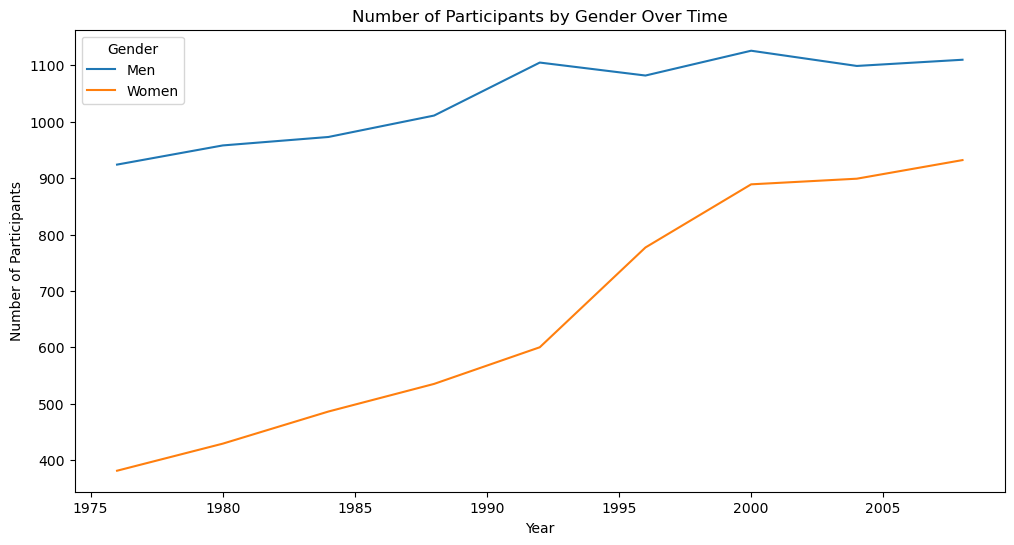

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=gender_counts, x='Year', y='Men', label='Men')
sns.lineplot(data=gender_counts, x='Year', y='Women', label='Women')

# Customize the plot
plt.title('Number of Participants by Gender Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.legend(title='Gender')

# Show the plot
plt.show()

**3. Top 10 Countries by Medal Count** 

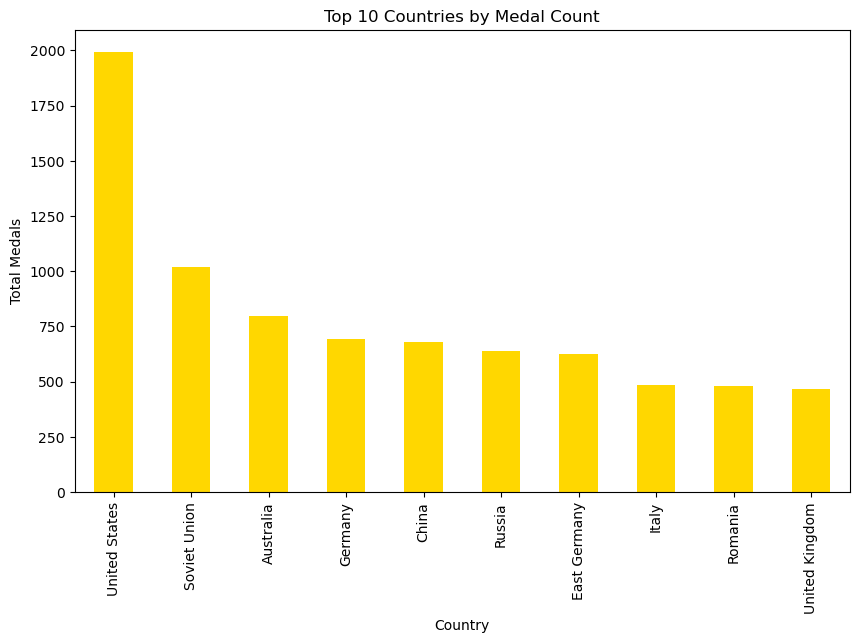

In [13]:
# Total medals won by each country
medals_by_country = df.groupby('Country')['Medal'].count().sort_values(ascending=False)

# Plotting the top 10 countries by medals
plt.figure(figsize=(10, 6))
medals_by_country.head(10).plot(kind='bar', color='gold')
plt.title("Top 10 Countries by Medal Count")
plt.xlabel("Country")
plt.ylabel("Total Medals")
plt.show()

**4. What sports have have the highest number of medals being awarded?**

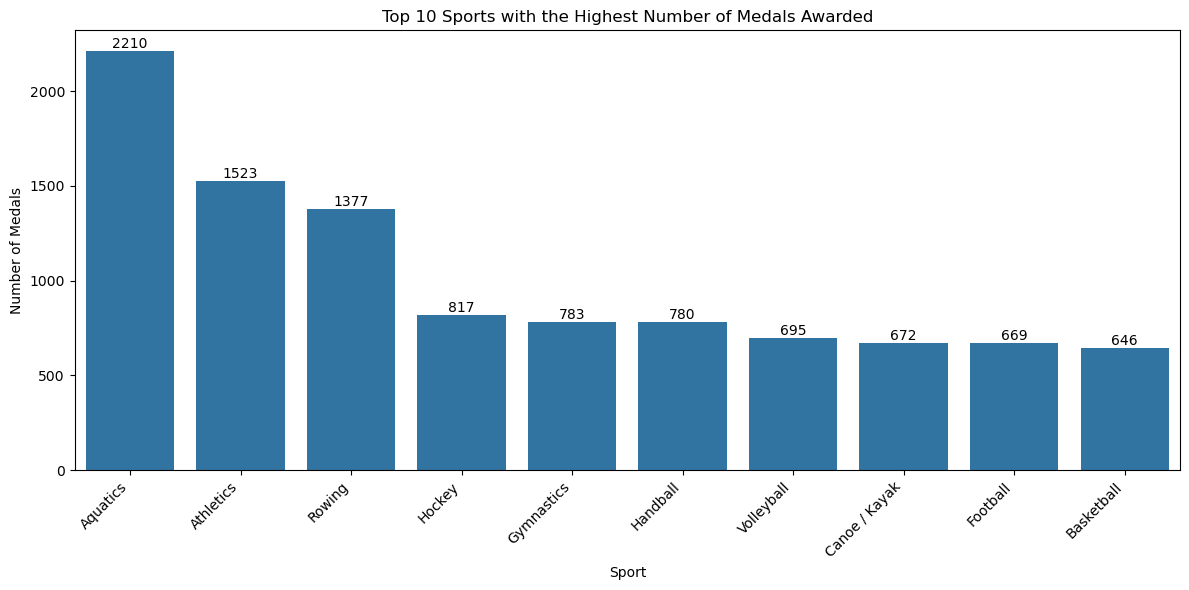

In [14]:
#group by Sport and count the medals
sport_medal_counts = df.groupby('Sport')['Medal'].count().sort_values(ascending=False).reset_index()

#top 10 sports
top_10_sports = sport_medal_counts.head(10)

#bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Sport', y='Medal', data=top_10_sports)

#customize the plot
plt.title('Top 10 Sports with the Highest Number of Medals Awarded')
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45, ha='right')

#add value labels on top of each bar
for i, v in enumerate(top_10_sports['Medal']):
    plt.text(i, v, str(v), ha='center', va='bottom')

#adjust layout and display the plot
plt.tight_layout()
plt.show()

## 5. Total Medals Won Over the Years

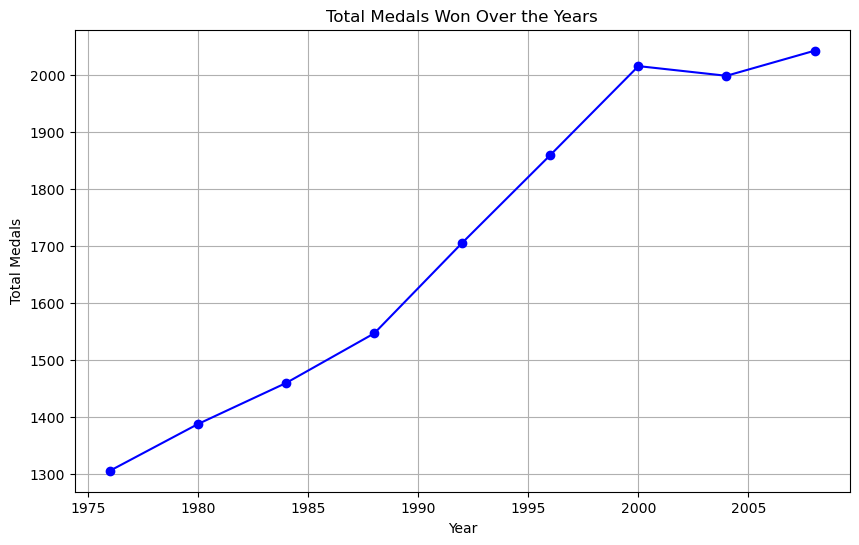

In [15]:
# Grouping by Year and counting the medals won
medals_over_years = df.groupby('Year')['Medal'].count()

# Plotting the trend of medals won over the years
plt.figure(figsize=(10, 6))
plt.plot(medals_over_years.index, medals_over_years.values,

marker='o', linestyle='-', color='b')
plt.title("Total Medals Won Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.grid(True)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

# Encode categorical variables using LabelEncoder
le = LabelEncoder()
df['Country_Code'] = le.fit_transform(df['Country_Code'])
df['Sport'] = le.fit_transform(df['Sport'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Event_gender'] = le.fit_transform(df['Event_gender'])
df['Medal'] = df['Medal'].map({'Gold': 1,'Silver': 2, 'Bronze': 3, np.nan: 0})

# Features and target
X = df[['Country_Code', 'Sport', 'Gender','Event_gender']]
y = df['Medal']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

In [17]:
# Model evaluation

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))

Accuracy Score: 0.3399347116430903
Confusion Matrix:
 [[614  55 886]
 [547  52 912]
 [562  71 896]]
Classification Report:
               precision    recall  f1-score   support

           1       0.36      0.39      0.37      1555
           2       0.29      0.03      0.06      1511
           3       0.33      0.59      0.42      1529

    accuracy                           0.34      4595
   macro avg       0.33      0.34      0.29      4595
weighted avg       0.33      0.34      0.29      4595



In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],              # Number of trees
    'max_depth': [None, 10, 20, 30],             # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],             # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],               # Minimum samples required at each leaf node
    'bootstrap': [True, False]                   # Whether bootstrap samples are used
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid,
                              cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model to training data
grid_search_rf.fit(X_train, y_train)

# Best parameters and estimator
print("Best Parameters:", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_

# Predict on test data
y_pred_rf = best_rf_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.5331882480957563
Confusion Matrix:
 [[936 288 331]
 [424 715 372]
 [401 329 799]]
Classification Report:
               precision    recall  f1-score   support

           1       0.53      0.60      0.56      1555
           2       0.54      0.47      0.50      1511
           3       0.53      0.52      0.53      1529

    accuracy                           0.53      4595
   macro avg       0.53      0.53      0.53      4595
weighted avg       0.53      0.53      0.53      4595



#  Key Insights

## 1.  Athlete Participation Trends
- Overall increase in athlete participation over the years, reflecting the growing scale and inclusivity of the Summer Olympics.
- **Gender-specific trend** shows:
  - A consistent increase in **female participation**.
  - **Male participation** remained higher but grew at a slower rate.
  - The gender gap has been **narrowing steadily since the 1980s**.

## 2.  Top Medal-Winning Countries
- **United States** dominated with nearly **2,000 medals**.
- **Soviet Union**, **Australia**, **Germany**, and **China** followed with strong performances.
- Traditional sports powers show **consistent dominance across decades**.

## 3.  Sports with the Most Medals
- **Aquatics**, **Athletics**, and **Rowing** were the most medal-rich sports.
- **Aquatics** led with over **2,200 medals**, suggesting its diverse set of events and strong global participation.
- Sports like **Gymnastics**, **Handball**, and **Volleyball** also featured prominently.

## 4.  Machine Learning: Medal Prediction

###  Logistic Regression
- **Accuracy**: ~34%
- **Performance**:
  - Low precision and recall, especially for **Silver medals (class 2)**.
  - Low F1-scores indicate **underperformance**.
- The model **struggled with multiclass classification**, likely due to limited features.

###  Random Forest (after GridSearchCV tuning)
- **Accuracy**: ~53%
- **Best Params**:  
  `bootstrap=False`, `max_depth=20`, `min_samples_leaf=1`, `min_samples_split=5`, `n_estimators=200`
- **Improved performance** over Logistic Regression:
  - **Higher precision, recall, and F1-score** across all classes.
  - Especially more **balanced prediction** for Gold, Silver, and Bronze.

---

#  Conclusion
- The dataset reveals a **rich history of Olympic performance**, with growing **global participation** and increasing **gender diversity** over time.
- **United States** and **Aquatics** lead in medal counts by **country** and **sport** respectively.
- On the machine learning front:
  - **Random Forest** clearly outperforms Logistic Regression for predicting medal types.
  - However, both models are limited by **simplistic features** (e.g., no performance stats or timing data).

---

#  Recommendations for Future Work

##  Feature Engineering
- Include athlete-specific features like **age**, **previous medals**, or **event difficulty**.
- Consider **one-hot encoding** instead of LabelEncoder for nominal variables.

##  Class Balancing
- Use **SMOTE** or **class weights** to handle class imbalance in medal prediction.

##  Model Enhancement
- Try more powerful models like **XGBoost**, **LightGBM**, or **Neural Networks**.
- Implement **cross-validation** to ensure model stability.

##  EDA Expansion
- Explore medals by **continent** or **country clusters**.
- Investigate **event-level trends** or sport-specific dominance.
